In [220]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Part A: histogram

In [221]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text



c1_train = fetch_20newsgroups(subset='train', categories=['comp.graphics'], shuffle=True, random_state=42)
c2_train = fetch_20newsgroups(subset='train', categories=['comp.os.ms-windows.misc'], shuffle=True, random_state=42)
c3_train = fetch_20newsgroups(subset='train', categories=['comp.sys.ibm.pc.hardware'], shuffle=True, random_state=42) 
c4_train = fetch_20newsgroups(subset='train', categories=['comp.sys.mac.hardware'], shuffle=True, random_state=42)

r1_train = fetch_20newsgroups(subset='train', categories=['rec.autos'], shuffle=True, random_state=42)
r2_train = fetch_20newsgroups(subset='train', categories=['rec.motorcycles'], shuffle=True, random_state=42)
r3_train = fetch_20newsgroups(subset='train', categories=['rec.sport.baseball'], shuffle=True, random_state=42)
r4_train = fetch_20newsgroups(subset='train', categories=['rec.sport.hockey'], shuffle=True, random_state=42)



comp_categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware']
rec_categories = ['rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']

combined_categories = comp_categories + rec_categories

X_train = fetch_20newsgroups(subset='train', categories=combined_categories, shuffle=True, random_state=42)
X_test = fetch_20newsgroups(subset='test', categories=combined_categories, shuffle=True, random_state=42)

comp_train = fetch_20newsgroups(subset='train', categories=comp_categories, shuffle=True, random_state=42)
rec_train = fetch_20newsgroups(subset='train', categories=rec_categories, shuffle=True, random_state=42)


(584, 591, 590, 578, 594, 598, 597, 600)


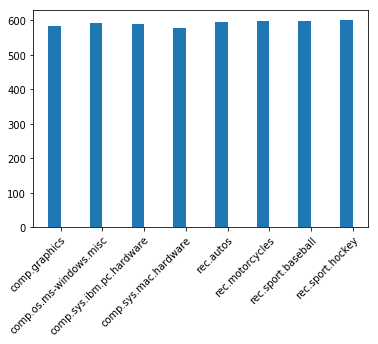

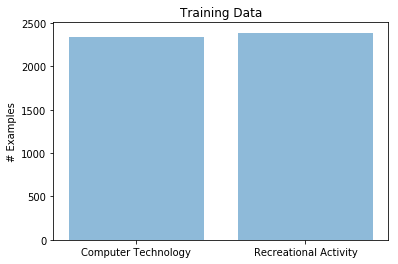

In [222]:
data_lens = []
data_lens = (len(c1_train.data),
             len(c2_train.data),
             len(c3_train.data),
             len(c4_train.data),
             len(r1_train.data),
             len(r2_train.data),
             len(r3_train.data),
             len(r4_train.data)
            )
print(data_lens)

names = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'rec.autos', 'rec.motorcycles',  'rec.sport.baseball', 'rec.sport.hockey']
ax = plt.subplot(111)
width = 0.3

#bins = map(lambda x: x-width/2, range(1, len(data_lens)+1))
index = np.arange(8)
ax.bar(index, data_lens, width=width)

#ax.set_xticks(map(lambda x: x, range(1, len(data_lens)+1)))
ax.set_xticks(index + width/2)
ax.set_xticklabels(names,rotation=45, rotation_mode="anchor", ha="right")

plt.show()

plt.bar(np.arange(2), [len(comp_train.filenames), len(rec_train.filenames)], align='center', alpha=0.5)
plt.xticks(np.arange(2), ('Computer Technology', 'Recreational Activity'))
plt.ylabel('# Examples')
plt.title('Training Data')
plt.show()


# Part B: TFxIDF

In [223]:
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction import text
from nltk.stem.snowball import SnowballStemmer
from nltk.tag import pos_tag
import nltk
import re
import string
stop_words = text.ENGLISH_STOP_WORDS


from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer # what kind of stemming algorithm to use?

import re

class MyTokenizer(object):
    def __init__(self):
        self.stemmer = PorterStemmer()
        self.token_pattern = re.compile(u'(?u)\\b\\w\\w+\\b')
        
    def __call__(self, doc):
        return [self.stemmer.stem(w) for w in self.token_pattern.findall(doc)]




vectorizer = CountVectorizer(stop_words=stop_words, min_df=2, tokenizer=MyTokenizer())
vectorizer_df5 = CountVectorizer(stop_words=stop_words, min_df=5, tokenizer=MyTokenizer())

X_train_vectors = vectorizer.fit_transform(X_train.data)
X_test_vectors = vectorizer.transform(X_test.data)


X_train_vectors_df5 = vectorizer_df5.fit_transform(X_train.data)
X_test_vectors_df5 = vectorizer_df5.transform(X_test.data)


print(X_train_vectors.shape[1])
print(X_train_vectors_df5.shape[1])

25305
10691


# Part C: 10 most significant terms

In [186]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import math

"""
TFxICF = tf(t,c) * icf(t)
tf(t,c): term frequency of term t in class c
cf(t): class frequency (number of classes that contain t)

icf(t) = log(n_classes/cf(t)) + 1
cf(t): class frequency = number of classes where there is at least a document with term t
 
 we care about (zero-indexed) classes: 3,4,6,15
"""
n_classes = 20
categories = ['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware', 
 'comp.sys.mac.hardware', 
 'comp.windows.x',
 'misc.forsale', 
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian', 
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']



all_docs_per_category=[]
#for each category, aggregate all of its documents into one large document
for cur_cat in categories:
    categories=[str(cur_cat)]
    docs_for_cat = fetch_20newsgroups(subset='train',categories=categories).data
    aggregated_docs = ""
    for doc in docs_for_cat:
        aggregated_docs= aggregated_docs + " "+doc
    all_docs_per_category.append(aggregated_docs)
    

#we will want to test both min_df=2 and min_df=5
"""
analyzer='word'means feature is made of words
stop_words='english' or use the stop_words from above
tokenizer=custom_tokenizer (use our custom tokenizer)
lowercase is true by default (to lower)
min_df=2
"""
vec = CountVectorizer(analyzer='word', stop_words=stop_words, 
                             tokenizer=MyTokenizer(), min_df=2, lowercase=True)
all_train_vecs = vec.fit_transform(all_docs_per_category)




In [187]:
#print(all_train_vecs[1,:])
def calculate_tcicf(freq, max_tf_per_class, class_count_per_term):
    return (freq/float(max_tf_per_class))*(math.log10(n_classes/class_count_per_term) + 1)

def calculate_total_tcicf():
    #shape[0] = #classes
    #shape[1] = #features
    num_classes = all_train_vecs.shape[0]
    num_features = all_train_vecs.shape[1]
    
    #[i,:] gives us all columns in row i
    #[:,i] gives us all rows in col i 
    #np.amax gives us max value in that row
    max_tf_per_class = [np.amax(all_train_vecs[i,:]) for i in range(0, num_classes)]
    
    #need to iterate through whole matrix and check counts 
    class_count_per_term = np.zeros(num_features)
    
    #iterate through all of the classes
    for c in range(0, num_classes):
        #iterate through all of the features for that class (rows)
        for feature in range(0, num_features):
            if(all_train_vecs[c, feature] != 0):
                class_count_per_term[feature] += 1
                
    #tcicf matrix is terms * classes (?) big_num*20
    tf_icf = np.zeros((num_features, num_classes))


    for term in range(0, num_features):
        row = all_train_vecs[:,term].toarray()
        for c in range(0, num_classes):
            #we're indexing across first
            tf_icf[term][c] = calculate_tcicf(row[c,0], max_tf_per_class[c],class_count_per_term[term])

    return tf_icf
                
        
        

        

In [188]:
import operator 

tf_icf=calculate_total_tcicf()
cats_of_interest = [3,4,6,15]
terms = vectorizer.get_feature_names()

for cat in cats_of_interest:
    i = 0
    tf_dict = {}
    for term in terms:
        tf_dict[term] = tf_icf[i][cat]
        i += 1
        
# print top 10 significant term for this class
    #sort in increasing order and pick top 10 elements
    sorted_vals = sorted(tf_dict.items(), key=lambda elem: elem[1], reverse=True)
    top_to_bottom = sorted_vals[:10] 
    
    #need to extract 
    keys = []
    for pair in top_to_bottom: 
        keys.append(pair[0])

    print(keys)




['sit', 'dkl', 'duo', 'undo', 'wonder', 'low', 'cept', 'thought', 'overplay', 'impress']
['duo', 'undo', 'low', 'makela', 'thought', 'overplay', 'wonder', 'aarghhhh', 'pub', 'quickr']
['duo', '00', 'low', 'thought', 'sexton', 'overplay', 'pub', 'nippl', 'undo', 'cept']
['undo', 'gouraud', 'z9k', 'c8d', 'duo', 'holos0', 'jznkj', 'thought', 'pivonka', 'low']


# Part D: Dimensionality Reduction

In [224]:
from sklearn.feature_extraction.text import TfidfTransformer 
tfidf_tf = TfidfTransformer(norm='l2')

X_train_tfidf = tfidf_tf.fit_transform(X_train_vectors)
X_test_tfidf = tfidf_tf.transform(X_test_vectors)

X_train_tfidf_df5 = tfidf_tf.fit_transform(X_train_vectors_df5)
X_test_tfidf_df5 = tfidf_tf.transform(X_test_vectors_df5)


In [225]:
#perform LSI w/ k=50
#NMF: min W,H: ||X-WH||^2

from sklearn.decomposition import NMF
nmf_model = NMF(n_components=50, init='random', random_state=0)
train_nmf = nmf_model.fit_transform(X_train_tfidf)
test_nmf = nmf_model.transform(X_test_tfidf)




H = nmf_model.components_

In [226]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline

svd = TruncatedSVD(n_components=50)

def get_lsi_df2(train_matrix, test_matrix):
    p = Pipeline(
        steps=[
            ('vector_counts', vectorizer),
            ('tfidf_transform', tfidf_tf),
            ('solve_svd', svd)
            
        ]
    )
    

    return p.fit_transform(train_matrix), p.transform(test_matrix)


def get_lsi_df5(train_matrix, test_matrix):
    p = Pipeline(
        steps=[
            ('vector_counts', vectorizer_df5),
            ('tfidf_transform', tfidf_tf),
            ('solve_svd', svd)
            
        ]
    )
    

    return p.fit_transform(train_matrix), p.transform(test_matrix)

In [227]:
#Qprint(len(X_train.data))
train_lsi, test_lsi = get_lsi_df2(X_train.data, X_test.data)

train_lsi_df5, test_lsi_df5 = get_lsi_df5(X_train.data, X_test.data)



# Learning Algorithms

# Part E: SVM

In [228]:
from sklearn.metrics import *


"""
Need to take our combined data and separate it into the two groups for 
binary classificaiton (computer tech or recreation)
"""
y_train = [int(x/4) for x in X_train.target]
y_test = [int(x/4) for x in X_test.target]


#Some performance metric evaluations
def evaluate(y_preds, y_test):

    f1 = f1_score(y_true=y_test, y_pred=y_preds, average='macro')
    acc = accuracy_score(y_test, y_preds)
    conf = confusion_matrix(y_test, y_preds)
    prec = precision_score(y_test, y_preds, average='macro')
    rec = recall_score(y_test, y_preds, average='macro')


    print("F1: ", f1)
    print("Accuracy: ", acc)
    print("Precision: ", prec)
    print("Recall: ", rec)
    print("Confusion matrix: \n", conf)
    return (f1, acc, prec, rec, conf)

def roc_auc(probs, y):
    fpr, tpr, thresholds = roc_curve(y, probs[:, 1])
    roc_auc = auc(fpr, tpr)
    roc_str = 'ROC (AUC Gain = %0.2f)' % (roc_auc - 0.5)
    plt.plot(fpr, tpr, lw=1,label=roc_str)
    plt.plot([0,1],[0,1],label="RAN CLF")
    plt.title(roc_str)
    plt.show()
    
    
def prrc_auc(probs, y):
    pr, rc, thresholds = precision_recall_curve(y, probs[:, 1])
    roc_auc = auc(rc, pr)
    roc_str = 'Prec vs Recall (AUC Gain = %0.2f)' % (roc_auc - np.mean(y))
    plt.plot(rc,pr, lw=1,label=roc_str)
    plt.plot([0,1],[np.mean(y),np.mean(y)],label="RAN CLF")
    plt.axis([0,1,0,1])
    plt.title(roc_str)
    plt.show()
    
#print(X_test.target)
#print(y_test)
#print(y_train)

<h3> Evaluating the hard margin SVM (gamma=1000) w/ LSI</h3>

Testing with LSI and min_df = 2


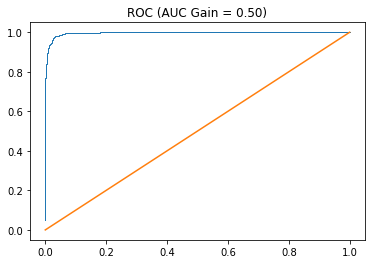

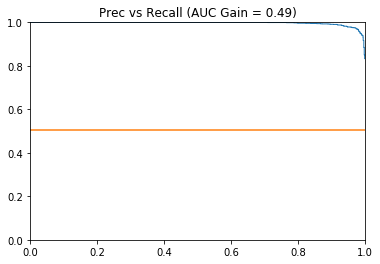

F1:  0.971736116243
Accuracy:  0.971746031746
Precision:  0.971981357887
Recall:  0.971655781326
Confusion matrix: 
 [[1501   59]
 [  30 1560]]
Testing with LSI and min_df = 5


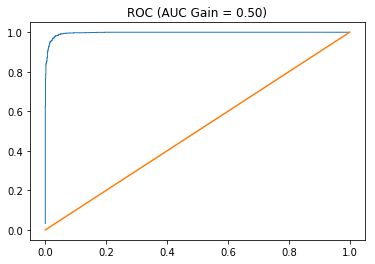

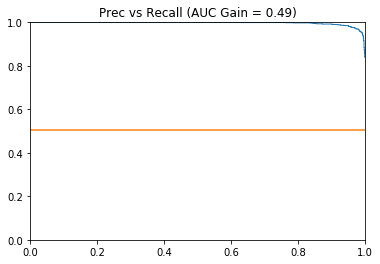

F1:  0.974596774194
Accuracy:  0.974603174603
Precision:  0.974731789949
Recall:  0.97454039671
Confusion matrix: 
 [[1510   50]
 [  30 1560]]


(0.9745967741935484,
 0.97460317460317458,
 0.9747317899491813,
 0.97454039671020798,
 array([[1510,   50],
        [  30, 1560]]))

In [240]:
from sklearn.svm import SVC
print("Testing with LSI and min_df = 2")
clf_lsi = SVC(C=1000, kernel='linear', probability=True)
clf_lsi.fit(train_lsi, y_train)

y_preds = clf_lsi.predict(test_lsi)
y_probs = clf_lsi.predict_proba(test_lsi)
#plot curves and evaluate
roc_auc(y_probs, y_test)
prrc_auc(y_probs, y_test)
evaluate(y_preds, y_test)

print("Testing with LSI and min_df = 5")
clf_lsi_df5 = SVC(C=1000, kernel='linear', probability=True)
clf_lsi_df5.fit(train_lsi_df5, y_train)

y_preds = clf_lsi_df5.predict(test_lsi_df5)
y_probs = clf_lsi_df5.predict_proba(test_lsi_df5)
#plot curves and evaluate
roc_auc(y_probs, y_test)
prrc_auc(y_probs, y_test)
evaluate(y_preds, y_test)


<h3> Evaluating the hard margin SVM (gamma=1000) w/ NMF</h3>

Testing SVM w/ NMF min_df=2


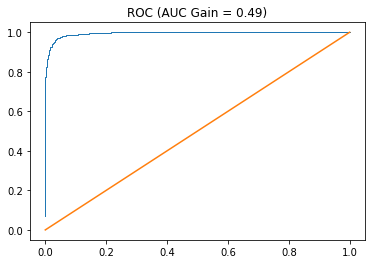

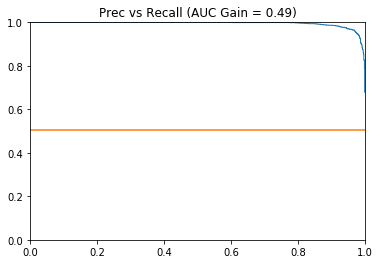

F1:  0.963798885115
Accuracy:  0.96380952381
Precision:  0.963976097816
Recall:  0.963733671988
Confusion matrix: 
 [[1491   69]
 [  45 1545]]


(0.96379888511453715,
 0.96380952380952378,
 0.96397609781598514,
 0.963733671988389,
 array([[1491,   69],
        [  45, 1545]]))

In [241]:
print("Testing SVM w/ NMF min_df=2")
clf_nmf = SVC(C=1000, kernel='linear', probability=True)
clf_nmf.fit(train_nmf, y_train)

y_preds = clf_nmf.predict(test_nmf)
y_probs = clf_nmf.predict_proba(test_nmf)
#plot curves and evaluate
roc_auc(y_probs, y_test)
prrc_auc(y_probs, y_test)
evaluate(y_preds, y_test)

<h3> Evaluating the Soft Margin SVM (gamma = 0.001) w/ LSI</h3>

Testing with LSI and min_df = 2


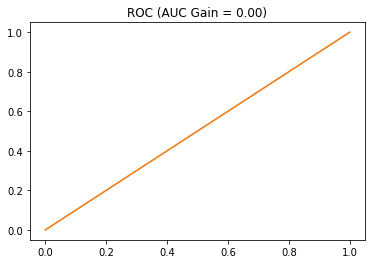

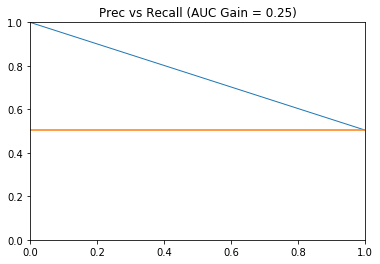

F1:  0.335443037975
Accuracy:  0.504761904762
Precision:  0.252380952381
Recall:  0.5
Confusion matrix: 
 [[   0 1560]
 [   0 1590]]
Testing with LSI and min_df = 5


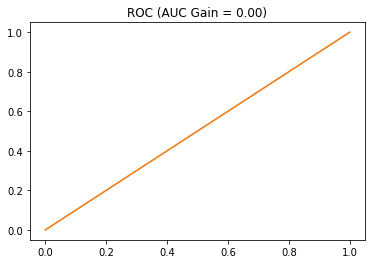

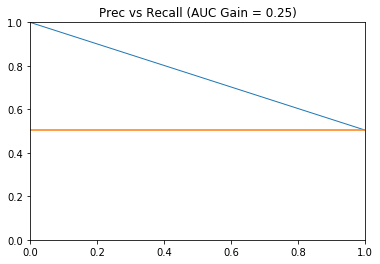

F1:  0.335443037975
Accuracy:  0.504761904762
Precision:  0.252380952381
Recall:  0.5
Confusion matrix: 
 [[   0 1560]
 [   0 1590]]


(0.33544303797468356,
 0.50476190476190474,
 0.25238095238095237,
 0.5,
 array([[   0, 1560],
        [   0, 1590]]))

In [242]:
from sklearn.svm import SVC
print("Testing with LSI and min_df = 2")
clf_lsi = SVC(C=0.001, kernel='linear', probability=True)
clf_lsi.fit(train_lsi, y_train)

y_preds = clf_lsi.predict(test_lsi)
y_probs = clf_lsi.predict_proba(test_lsi)
#plot curves and evaluate
roc_auc(y_probs, y_test)
prrc_auc(y_probs, y_test)
evaluate(y_preds, y_test)

print("Testing with LSI and min_df = 5")
clf_lsi_df5 = SVC(C=0.001, kernel='linear', probability=True)
clf_lsi_df5.fit(train_lsi_df5, y_train)

y_preds2 = clf_lsi_df5.predict(test_lsi_df5)
y_probs2 = clf_lsi_df5.predict_proba(test_lsi_df5)
#plot curves and evaluate
roc_auc(y_probs2, y_test)
prrc_auc(y_probs2, y_test)
evaluate(y_preds2, y_test)



<h3> Evaluating the Soft Margin SVM (gamma = 0.001) w/ NMF</h3>

Testing SVM w/ NMF min_df=2


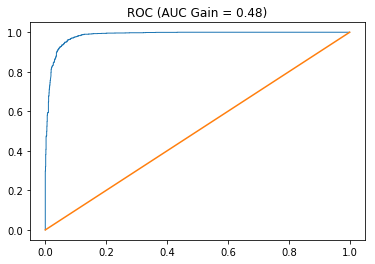

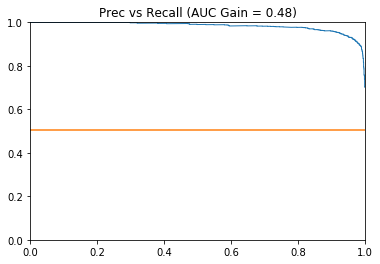

F1:  0.335443037975
Accuracy:  0.504761904762
Precision:  0.252380952381
Recall:  0.5
Confusion matrix: 
 [[   0 1560]
 [   0 1590]]


(0.33544303797468356,
 0.50476190476190474,
 0.25238095238095237,
 0.5,
 array([[   0, 1560],
        [   0, 1590]]))

In [243]:
print("Testing SVM w/ NMF min_df=2")
clf_nmf = SVC(C=0.001, kernel='linear', probability=True)
clf_nmf.fit(train_nmf, y_train)

y_preds = clf_nmf.predict(test_nmf)
y_probs = clf_nmf.predict_proba(test_nmf)
#plot curves and evaluate
roc_auc(y_probs, y_test)
prrc_auc(y_probs, y_test)
evaluate(y_preds, y_test)

# Part F: 5-Fold Cross Validation

In [198]:
from sklearn.model_selection import KFold
from sklearn import cross_validation as cv

def run_kfold(x_train, y_train, x_test, y_test, clf_type='svm', penalty='l2'):
    kf = KFold(n_splits=5, shuffle=True)
    k_vals = [-3, -2, -1, 0, 1, 2, 3]
    results = []
    for kv in k_vals:
        gamma = 10**(kv)
        if(clf_type=='svm'):
            clf = SVC(C=gamma, kernel='linear', probability=True)
        elif(clf_type=='logistic_regression'):
            clf = LogisticRegression(C=gamma, penalty=penalty)
            
        cv_score = cv.cross_val_score(clf, x_train, y_train, cv=5, scoring='accuracy')
        mean = np.mean(cv_score)
        print(cv_score)
        results.append(mean)
    #    print("Mean score for gamma=",gamma," is: ", mean)

    print(results)


    #Select the best classifier
    best_index = np.argmax(results)
    best_k = k_vals[best_index]
    print("Best classifier is k=", best_k, " gamma=", 10**best_k)

    
    
    #clf_best = SVC(C=(10**best_k))
    #clf_best.fit(x_train, y_train)
    #y_preds = clf_best.predict(x_test)
    #metrics = evaluate(y_preds, y_test)




In [199]:
"""
print("Cross validation for LSI & min_df = 2...")
run_kfold(train_lsi, y_train, test_lsi, y_test)
print("\n")

print("Cross validation for LSI & min_df = 5...")
run_kfold(train_lsi_df5, y_train, test_lsi_df5, y_test)
print("\n")
"""
print("Cross validation for NMF & min_df = 2...")
run_kfold(train_nmf, y_train, test_nmf, y_test)
print("\n")

Cross validation for NMF & min_df = 2...
[ 0.50475185  0.50475185  0.50475185  0.50528541  0.5047619 ]
[ 0.50475185  0.50475185  0.50475185  0.50528541  0.5047619 ]
[ 0.50475185  0.50475185  0.50475185  0.50528541  0.5047619 ]
[ 0.95776135  0.95353749  0.95776135  0.95137421  0.96190476]
[ 0.96515312  0.96409715  0.95881732  0.96300211  0.96613757]
[ 0.96832101  0.96937698  0.96198522  0.9640592   0.97354497]
[ 0.96832101  0.96620908  0.96832101  0.9640592   0.97248677]
[0.50486057216933178, 0.50486057216933178, 0.50486057216933178, 0.95646783183336803, 0.96344145242797052, 0.96745747605991705, 0.96787941557372559]
Best classifier is k= 3  gamma= 1000




# Part G: Naive Bayes 

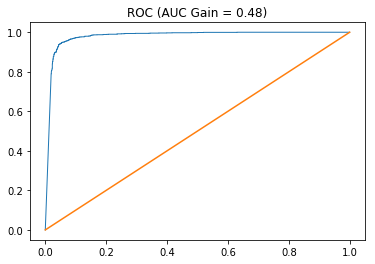

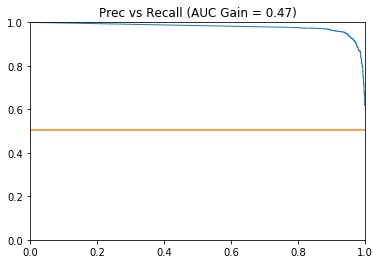

F1:  0.941545734109
Accuracy:  0.941587301587
Precision:  0.942227440603
Recall:  0.941418722787
Confusion matrix: 
 [[1441  119]
 [  65 1525]]


(0.94154573410933495,
 0.94158730158730164,
 0.94222744060255326,
 0.94141872278664729,
 array([[1441,  119],
        [  65, 1525]]))

In [244]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(train_nmf, y_train)

y_preds = clf.predict(test_nmf)
y_probs = clf.predict_proba(test_nmf)
#plot curves and evaluate
roc_auc(y_probs, y_test)
prrc_auc(y_probs, y_test)
evaluate(y_preds, y_test)



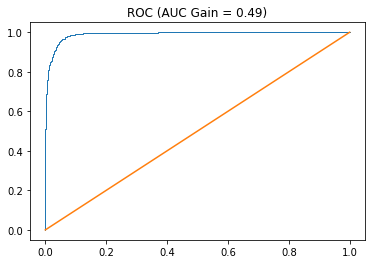

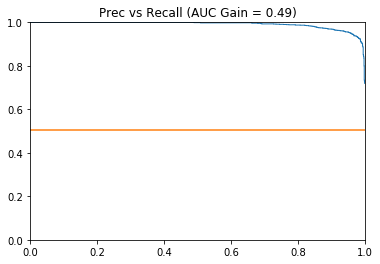

F1:  0.942657210264
Accuracy:  0.942857142857
Precision:  0.947616530091
Recall:  0.942380261248
Confusion matrix: 
 [[1392  168]
 [  12 1578]]


(0.94265721026417748,
 0.94285714285714284,
 0.94761653009075686,
 0.94238026124818575,
 array([[1392,  168],
        [  12, 1578]]))

In [245]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(train_nmf, y_train)

y_preds = clf.predict(test_nmf)
y_probs = clf.predict_proba(test_nmf)
#plot curves and evaluate
roc_auc(y_probs, y_test)
prrc_auc(y_probs, y_test)
evaluate(y_preds, y_test)




# Part H: Logistic Regression 

<h3> Logistic Regression w/ LSI & min_df=2 </h3>

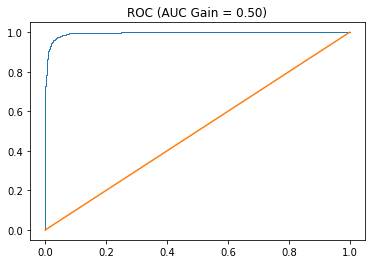

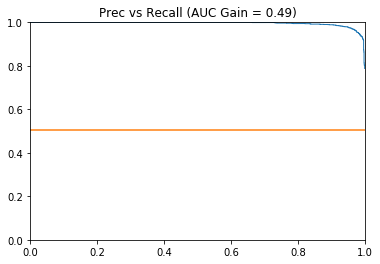

F1:  0.96538021418
Accuracy:  0.965396825397
Precision:  0.965781090515
Recall:  0.965275761974
Confusion matrix: 
 [[1486   74]
 [  35 1555]]


(0.96538021417986497,
 0.96539682539682536,
 0.96578109051547223,
 0.96527576197387521,
 array([[1486,   74],
        [  35, 1555]]))

In [246]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(train_lsi, y_train)
y_preds = clf.predict(test_lsi)
y_probs = clf.predict_proba(test_lsi)

roc_auc(y_probs, y_test)
prrc_auc(y_probs, y_test)
evaluate(y_preds, y_test)



<h3> Logistic Regression w/ LSI & min_df = 2 </h3>

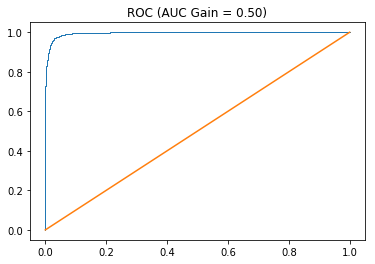

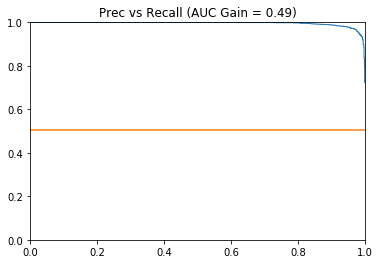

F1:  0.966649723483
Accuracy:  0.966666666667
Precision:  0.967087845799
Recall:  0.966539671021
Confusion matrix: 
 [[1487   73]
 [  32 1558]]


(0.9666497234825977,
 0.96666666666666667,
 0.96708784579870988,
 0.96653967102080318,
 array([[1487,   73],
        [  32, 1558]]))

In [247]:
clf = LogisticRegression()
clf.fit(train_lsi_df5, y_train)
y_preds = clf.predict(test_lsi_df5)
y_probs = clf.predict_proba(test_lsi_df5)


roc_auc(y_probs, y_test)
prrc_auc(y_probs, y_test)
evaluate(y_preds, y_test)



<h3> Logistic Regression w/ NMF & min_df=2 </h3>

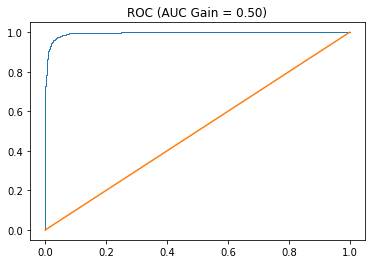

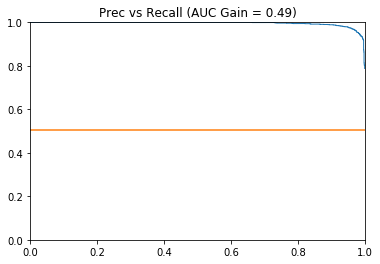

F1:  0.96538021418
Accuracy:  0.965396825397
Precision:  0.965781090515
Recall:  0.965275761974
Confusion matrix: 
 [[1486   74]
 [  35 1555]]


(0.96538021417986497,
 0.96539682539682536,
 0.96578109051547223,
 0.96527576197387521,
 array([[1486,   74],
        [  35, 1555]]))

In [248]:
clf = LogisticRegression()
clf.fit(train_lsi, y_train)
y_preds = clf.predict(test_lsi)
y_probs = clf.predict_proba(test_lsi)


roc_auc(y_probs, y_test)
prrc_auc(y_probs, y_test)
evaluate(y_preds, y_test)

# Part I(1): Regularization in Logistic Regression 

<h3> Logistic Regression w/ L1 Regularization, LSI, min_df=2 </h3>

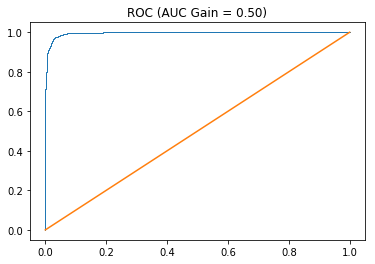

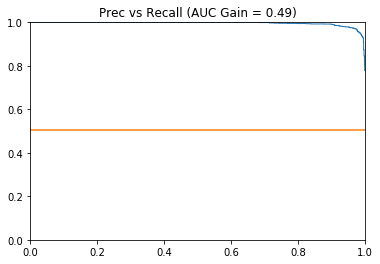

F1:  0.969196958508
Accuracy:  0.969206349206
Precision:  0.969388166719
Recall:  0.969127963232
Confusion matrix: 
 [[1499   61]
 [  36 1554]]


(0.96919695850838883,
 0.96920634920634918,
 0.96938816671877048,
 0.96912796323173689,
 array([[1499,   61],
        [  36, 1554]]))

In [249]:
"""
TODO: sweep coefficients 
"""
#Regularization L1
clf_l1 = LogisticRegression(penalty='l1')
clf_l1.fit(train_lsi, y_train)
y_preds_l1 = clf_l1.predict(test_lsi)
y_probs_l1 = clf_l1.predict_proba(test_lsi)


roc_auc(y_probs_l1, y_test)
prrc_auc(y_probs_l1, y_test)
evaluate(y_preds_l1, y_test)



<h3> Logistic Regression w/ L1 Regularization, LSI, min_df=5 </h3>

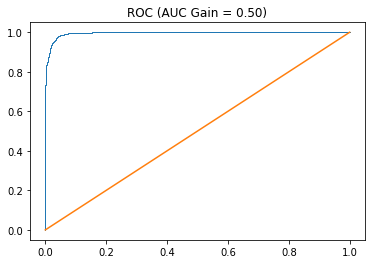

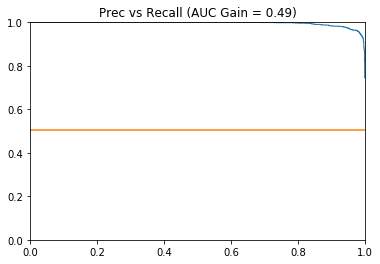

F1:  0.969196958508
Accuracy:  0.969206349206
Precision:  0.969388166719
Recall:  0.969127963232
Confusion matrix: 
 [[1499   61]
 [  36 1554]]


(0.96919695850838883,
 0.96920634920634918,
 0.96938816671877048,
 0.96912796323173689,
 array([[1499,   61],
        [  36, 1554]]))

In [250]:
"""
TODO: sweep coefficients 
"""
#Regularization L1
clf_l1_df5 = LogisticRegression(penalty='l1')
clf_l1_df5.fit(train_lsi_df5, y_train)
y_preds_l1_df5 = clf_l1_df5.predict(test_lsi_df5)
y_probs_l1_df5 = clf_l1_df5.predict_proba(test_lsi_df5)


roc_auc(y_probs_l1_df5, y_test)
prrc_auc(y_probs_l1_df5, y_test)
evaluate(y_preds_l1_df5, y_test)




<h3> Logistic Regression w/ L1 Regularization, NMF, min_df=2 </h3>

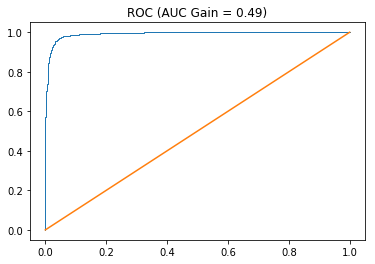

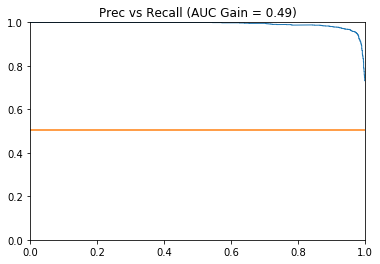

F1:  0.961884848683
Accuracy:  0.961904761905
Precision:  0.962337973727
Recall:  0.961774310595
Confusion matrix: 
 [[1479   81]
 [  39 1551]]


(0.96188484868284918,
 0.96190476190476193,
 0.96233797372704022,
 0.96177431059506535,
 array([[1479,   81],
        [  39, 1551]]))

In [251]:
"""
TODO: sweep coefficients 
"""
#Regularization L1
clf_l1_nmf = LogisticRegression(penalty='l1')
clf_l1_nmf.fit(train_nmf, y_train)
y_preds_l1_nmf = clf_l1_nmf.predict(test_nmf)
y_probs_l1_nmf = clf_l1_nmf.predict_proba(test_nmf)


roc_auc(y_probs_l1_nmf, y_test)
prrc_auc(y_probs_l1_nmf, y_test)
evaluate(y_preds_l1_nmf, y_test)




<h3> Logistic Regression w/ L2 Regularization, LSI, min_df=2 </h3>

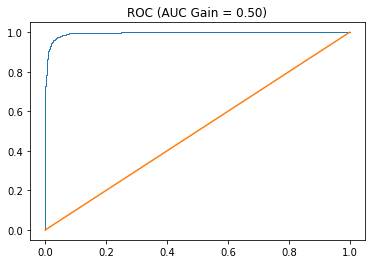

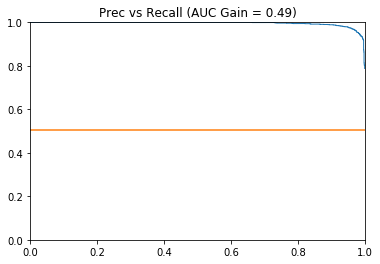

F1:  0.96538021418
Accuracy:  0.965396825397
Precision:  0.965781090515
Recall:  0.965275761974
Confusion matrix: 
 [[1486   74]
 [  35 1555]]


(0.96538021417986497,
 0.96539682539682536,
 0.96578109051547223,
 0.96527576197387521,
 array([[1486,   74],
        [  35, 1555]]))

In [252]:
#Regularization L2
clf_l2 = LogisticRegression(penalty='l2')
clf_l2.fit(train_lsi, y_train)
y_preds_l2 = clf_l2.predict(test_lsi)
y_probs_l2 = clf_l2.predict_proba(test_lsi)


roc_auc(y_probs_l2, y_test)
prrc_auc(y_probs_l2, y_test)
evaluate(y_preds_l2, y_test)



<h3> Logistic Regression w/ L2 Regularization, LSI, min_df=5 </h3>

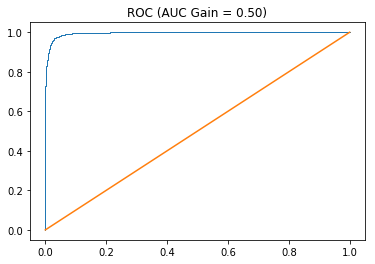

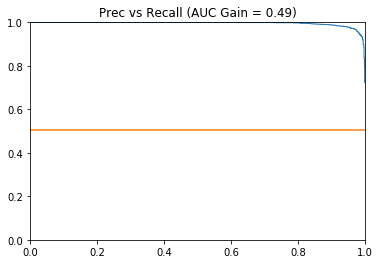

F1:  0.966649723483
Accuracy:  0.966666666667
Precision:  0.967087845799
Recall:  0.966539671021
Confusion matrix: 
 [[1487   73]
 [  32 1558]]


(0.9666497234825977,
 0.96666666666666667,
 0.96708784579870988,
 0.96653967102080318,
 array([[1487,   73],
        [  32, 1558]]))

In [253]:
#Regularization L2
clf_l2 = LogisticRegression(penalty='l2')
clf_l2.fit(train_lsi_df5, y_train)
y_preds_l2 = clf_l2.predict(test_lsi_df5)
y_probs_l2 = clf_l2.predict_proba(test_lsi_df5)


roc_auc(y_probs_l2, y_test)
prrc_auc(y_probs_l2, y_test)
evaluate(y_preds_l2, y_test)




<h3> Logistic Regression w/ L2 Regularization, NMF, min_df=2 </h3>

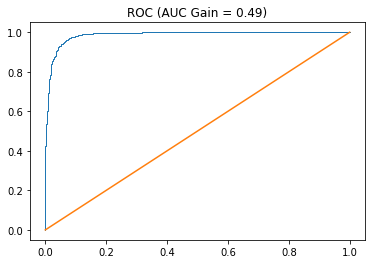

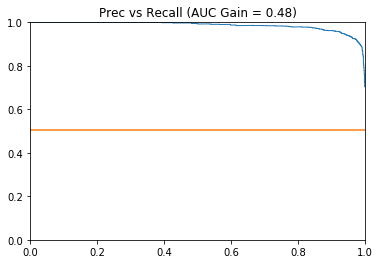

F1:  0.944416205804
Accuracy:  0.944444444444
Precision:  0.944837494738
Recall:  0.944315432995
Confusion matrix: 
 [[1452  108]
 [  67 1523]]


(0.9444162058043295,
 0.94444444444444442,
 0.94483749473761536,
 0.94431543299467835,
 array([[1452,  108],
        [  67, 1523]]))

In [254]:
#Regularization L2
clf_l2 = LogisticRegression(penalty='l2')
clf_l2.fit(train_nmf, y_train)
y_preds_l2 = clf_l2.predict(test_nmf)
y_probs_l2 = clf_l2.predict_proba(test_nmf)


roc_auc(y_probs_l2, y_test)
prrc_auc(y_probs_l2, y_test)
evaluate(y_preds_l2, y_test)





In [211]:
#def run_kfold(x_train, y_train, x_test, y_test, clf_type='svm', penalty='l
    
run_kfold(train_nmf, y_train, test_nmf, y_test, clf_type='logistic_regression', penalty='l1')

[ 0.49524815  0.49524815  0.49524815  0.49471459  0.4952381 ]
[ 0.49524815  0.49524815  0.49524815  0.49471459  0.4952381 ]
[ 0.57655755  0.58817318  0.57866948  0.64059197  0.5957672 ]
[ 0.94720169  0.95353749  0.95881732  0.95877378  0.96507937]
[ 0.96726505  0.97043295  0.96832101  0.96617336  0.97460317]
[ 0.96515312  0.96937698  0.96832101  0.96088795  0.97354497]
[ 0.96515312  0.97043295  0.96726505  0.96300211  0.97671958]
[0.49513942783066822, 0.49513942783066822, 0.5959518746267598, 0.95668192872534608, 0.96935910870342723, 0.96745680631390696, 0.96851455992980018]
Best classifier is k= 1  gamma= 10


# Part I(2): Multiclass Classification 

In [255]:
pc_train = fetch_20newsgroups(subset='train', categories=['comp.sys.ibm.pc.hardware'], shuffle=True, random_state=42)
pc_test = fetch_20newsgroups(subset='test', categories=['comp.sys.ibm.pc.hardware'], shuffle=True, random_state=42)
mac_train = fetch_20newsgroups(subset='train', categories=['comp.sys.mac.hardware'], shuffle=True, random_state=42)
mac_test = fetch_20newsgroups(subset='test', categories=['comp.sys.mac.hardware'], shuffle=True, random_state=42)
fs_train = fetch_20newsgroups(subset='train', categories=['misc.forsale'], shuffle=True, random_state=42)
fs_test = fetch_20newsgroups(subset='test', categories=['misc.forsale'], shuffle=True, random_state=42)
jesus_train = fetch_20newsgroups(subset='train', categories=['soc.religion.christian'], shuffle=True, random_state=42)
jesus_test = fetch_20newsgroups(subset='test', categories=['soc.religion.christian'], shuffle=True, random_state=42)

In [256]:
tfidftrans = TfidfTransformer()

trainX = tfidftrans.fit_transform(vectorizer.fit_transform(pc_train.data+mac_train.data+fs_train.data+jesus_train.data))

y = np.zeros((len(pc_train.filenames)+len(mac_train.filenames)+len(fs_train.filenames)+len(jesus_train.filenames),))
y[len(pc_train.filenames):] = 1
y[len(pc_train.filenames)+len(mac_train.filenames):] = 2
y[len(pc_train.filenames)+len(mac_train.filenames)+len(fs_train.filenames):] = 3

testX = tfidftrans.transform(vectorizer.transform(pc_test.data+mac_test.data+fs_test.data+jesus_test.data))

trainX_lsi, testX_lsi = get_lsi_df2(pc_train.data+mac_train.data+fs_train.data+jesus_train.data,
                         pc_test.data+mac_test.data+fs_test.data+jesus_test.data)



testy = np.zeros((len(pc_test.filenames)+len(mac_test.filenames)+len(fs_test.filenames)+len(jesus_test.filenames),))
testy[len(pc_test.filenames):] = 1
testy[len(pc_test.filenames)+len(mac_test.filenames):] = 2
testy[len(pc_test.filenames)+len(mac_test.filenames)+len(fs_test.filenames):] = 3
                 



In [257]:
nmf = NMF(n_components=50, init='random', random_state=0)
train_nmf = nmf.fit_transform(trainX)
test_nmf = nmf.transform(testX)



<h3> Multiclass Naive Bayes w/ NMF and min_df=2 </h3>

In [258]:
clf = MultinomialNB()
clf.fit(train_nmf, y)
                 
ypred = clf.predict(test_nmf)
evaluate(testy, ypred)

F1:  0.806369424485
Accuracy:  0.809584664537
Precision:  0.808188840951
Recall:  0.811973309144
Confusion matrix: 
 [[302  89  44   2]
 [ 42 246  10   1]
 [ 41  42 327   3]
 [  7   8   9 392]]


(0.80636942448521276,
 0.80958466453674116,
 0.80818884095086529,
 0.81197330914441035,
 array([[302,  89,  44,   2],
        [ 42, 246,  10,   1],
        [ 41,  42, 327,   3],
        [  7,   8,   9, 392]]))

<h3> One vs. One w/ LSI & min_df=2 </h3>

In [259]:
clf = SVC(kernel='linear')
clf.fit(trainX_lsi, y)
ypred = clf.predict(testX_lsi)

evaluate(ypred, testy)




F1:  0.879986597482
Accuracy:  0.879872204473
Precision:  0.883253242574
Recall:  0.879178774683
Confusion matrix: 
 [[342  33  17   0]
 [ 62 302  21   0]
 [ 24  13 352   1]
 [ 12   3   2 381]]


(0.87998659748180208,
 0.87987220447284342,
 0.88325324257448412,
 0.87917877468308192,
 array([[342,  33,  17,   0],
        [ 62, 302,  21,   0],
        [ 24,  13, 352,   1],
        [ 12,   3,   2, 381]]))

<h3> One vs. One w/ NMF & min_df=2 </h3>

In [261]:
clf = SVC(kernel='linear')
clf.fit(train_nmf, y)
ypred = clf.predict(test_nmf)

evaluate(ypred, testy)

F1:  0.774535517711
Accuracy:  0.780191693291
Precision:  0.789721121929
Recall:  0.779381253767
Confusion matrix: 
 [[213  99  78   2]
 [ 37 271  74   3]
 [ 23   7 359   1]
 [  0   1  19 378]]


(0.77453551771095774,
 0.78019169329073479,
 0.78972112192925881,
 0.77938125376657319,
 array([[213,  99,  78,   2],
        [ 37, 271,  74,   3],
        [ 23,   7, 359,   1],
        [  0,   1,  19, 378]]))

<h3> One vs. Rest w/ LSI & min_df=2 </h3>

In [262]:
from sklearn.svm import LinearSVC

clf = LinearSVC()
clf.fit(trainX_lsi, y)
ypred = clf.predict(testX_lsi)
evaluate(ypred, testy)


F1:  0.885416286406
Accuracy:  0.886261980831
Precision:  0.885491941226
Recall:  0.885640656006
Confusion matrix: 
 [[325  41  24   2]
 [ 39 317  27   2]
 [ 18  16 354   2]
 [  4   1   2 391]]


(0.88541628640554748,
 0.88626198083067098,
 0.8854919412258393,
 0.88564065600587494,
 array([[325,  41,  24,   2],
        [ 39, 317,  27,   2],
        [ 18,  16, 354,   2],
        [  4,   1,   2, 391]]))

<h3> One vs. Rest w/ NMF & min_df=2 </h3>

In [263]:
clf = LinearSVC()
clf.fit(train_nmf, y)
ypred = clf.predict(test_nmf)
evaluate(ypred, testy)

F1:  0.825321468861
Accuracy:  0.828115015974
Precision:  0.825279992863
Recall:  0.827081655483
Confusion matrix: 
 [[282  69  36   5]
 [ 69 273  39   4]
 [ 26  11 350   3]
 [  1   2   4 391]]


(0.82532146886079483,
 0.82811501597444093,
 0.82527999286290976,
 0.82708165548258872,
 array([[282,  69,  36,   5],
        [ 69, 273,  39,   4],
        [ 26,  11, 350,   3],
        [  1,   2,   4, 391]]))